# Дубликаты, пропуски и неинформативные данные

Когда мы начинаем исследовать датасет, мы должны «почистить» его от плохих значений, наличие которых может влиять на результат обучения модели.
Но в первую очередь мы должны убедиться, что в выборке отсутствуют повторяющиеся объекты.

In [ ]:
import pandas as pd

Наша задача — построить модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства. 
Посмотрим, как проверить дублирующиеся строки на нашем датасете. 

Загрузим датасет.

In [ ]:
df = pd.read_csv('./data/vehicles_dataset.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


Посмотрим на размер выборки. 


In [ ]:
print(f'Размер выбоpки: {df.shape[0]}, {df.shape[1]}')

Размер выбоpки: 10050, 27


В датасете 10 050 строк. Узнать, есть ли среди всех значений дублирующиеся, можно с помощью метода `duplicated`, который возвращает булевую маску: если для объекта условие выполняется, то для него вернётся `True`, если нет —`False`. 

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10045    False
10046    False
10047    False
10048    False
10049    False
Length: 10050, dtype: bool

С помощью такой булевой маски мы можем отфильтровать необходимые значения. Отфильтруем только те строки, которые помечены как дублирующиеся. 

In [ ]:
df[df.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.032300,-104.716000,2021-04-25T20:15:43-0600,low
2159,7312437164,https://yakima.craigslist.org/ctd/d/parker-201...,yakima,https://yakima.craigslist.org,19995,2015.0,subaru,xv crosstrek,NaN,4 cylinders,...,SUV,white,https://images.craigslist.org/01414_cBd43F8IeC...,2015 Subaru XV Crosstrek 2.0i Limited AWD 4dr ...,NaN,wa,46.553190,-120.475680,2021-04-25T11:30:27-0700,medium
2398,7316719393,https://miami.craigslist.org/mdc/ctd/d/miami-2...,south florida,https://miami.craigslist.org,25590,2018.0,volkswagen,golf gti s hatchback,good,NaN,...,sedan,blue,https://images.craigslist.org/00y0y_7qosBCrp0z...,Carvana is the safer way to buy a car During t...,NaN,fl,25.770000,-80.200000,2021-05-04T11:01:11-0400,high
3067,7307971804,https://redding.craigslist.org/ctd/d/sacrament...,redding,https://redding.craigslist.org,8800,2008.0,honda,accord,excellent,NaN,...,sedan,silver,https://images.craigslist.org/00S0S_kT52djO80H...,2008 *** Honda Accord EX L w/Navi 4dr Sedan 5A...,NaN,ca,38.608824,-121.400837,2021-04-16T15:01:16-0700,low
3236,7307083381,https://westernmass.craigslist.org/ctd/d/sprin...,western massachusetts,https://westernmass.craigslist.org,21990,2017.0,gmc,acadia sle-1 sport utility,good,NaN,...,SUV,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,ma,42.110000,-72.530000,2021-04-15T06:10:54-0400,medium
3458,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015.0,ford,fusion se,good,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00S0S_3wmNGwLyaE...,"2015 Ford Fusion SE, 2.5 4 cyl. automatic, air...",NaN,ia,41.373000,-93.735800,2021-05-04T11:59:42-0500,low
3547,7313511076,https://athensohio.craigslist.org/ctd/d/athens...,athens,https://athensohio.craigslist.org,23590,2012.0,ford,f150 supercrew cab xlt,good,8 cylinders,...,pickup,white,https://images.craigslist.org/00J0J_4mfUGXkpYW...,Carvana is the safer way to buy a car During t...,NaN,oh,39.320000,-82.090000,2021-04-27T16:10:50-0400,high
3635,7314807085,https://oklahomacity.craigslist.org/ctd/d/norm...,oklahoma city,https://oklahomacity.craigslist.org,35988,2018.0,chevrolet,traverse premier,like new,NaN,...,NaN,NaN,https://images.craigslist.org/00i0i_4adOkOM7Vm...,THIS 2018 CHEVROLET TRAVERSE WAS JUST TRADED I...,NaN,ok,35.199000,-97.484100,2021-04-30T10:02:34-0500,high
3726,7311813732,https://youngstown.craigslist.org/ctd/d/struth...,youngstown,https://youngstown.craigslist.org,3000,2006.0,pontiac,grand prix,NaN,NaN,...,NaN,NaN,https://images.craigslist.org/00W0W_aE2NBfU8gr...,2007 PONTIAC GRAND PRIX. GOOD CONDITION IN & O...,NaN,oh,41.023719,-80.594793,2021-04-24T09:42:34-0400,low
3756,7308232496,https://raleigh.craigslist.org/ctd/d/raleigh-2...,raleigh / durham / CH,https://raleigh.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,SUV,NaN,https://images.craigslist.org/00I0I_luAr8SgpD6...,Carvana is the safer way to buy a car During t...,NaN,nc,35.820000,-78.650000,2021-04-17T10:51:25-0400,high


Отобразилось 50 строк. Проверим одну из них. Например, отфильтруем по первому идентификатору в списке. 

In [ ]:
df[df['id'] == 7312641615]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
616,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.0323,-104.716,2021-04-25T20:15:43-0600,low
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.0323,-104.716,2021-04-25T20:15:43-0600,low


Если попарно сравнить колонки, то увидим, что две строки идентичны.
Удалим лишние строки и сразу проверим размер датасета. 

In [ ]:
df = df.drop_duplicates()
df.shape

(10000, 27)

Видим, что осталось только 10 000 записей.


Теперь можно перейти к поиску пропущенных значений. Выведем информацию о датасете с помощью `info`. 

In [ ]:
print('Информация о выборке:\n')
df.info()

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    9618 non-null   object 
 7   model           9872 non-null   object 
 8   condition       6234 non-null   object 
 9   cylinders       5920 non-null   object 
 10  fuel            9937 non-null   object 
 11  odometer        9957 non-null   float64
 12  title_status    9834 non-null   object 
 13  transmission    9955 non-null   object 
 14  VIN             6062 non-null   object 
 15  drive           6994 non-null   object 
 16  size            2809 non-null   object 
 17  type    

В колонке `non-null count` указано, для скольки объектов в каждом признаке заполнены значения.

`id` заполнены во всех объектах, `region` тоже. Но также много признаков, в которых есть незаполненные значения. Например, для количества цилиндров `cylinders` заполнено только 5920 значений. 

Чтобы оценить количество заполненных значений визуально, можно воспользоваться пакетом `missingno`. 

In [ ]:
#!pip install missingno
import missingno as msno  # https://github.com/ResidentMario/missingno

С помощью `msno.bar` получаем изображение, на котором можем видеть наиболее проседающие по заполненным значениям признаки. В глаза сразу бросается бесполезный признак `county`, который совсем не содержит информации.



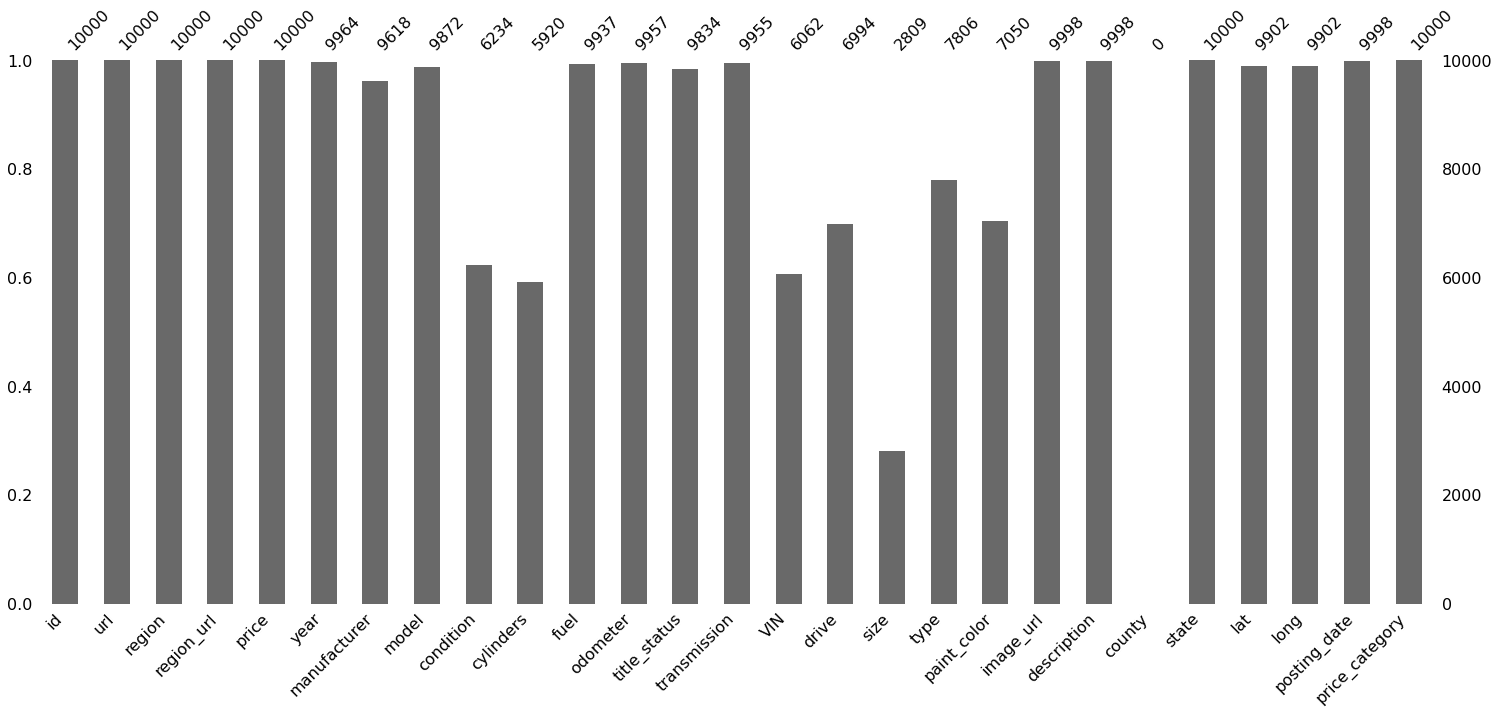

In [ ]:
msno.bar(df);

С помощью `msno.matrix` можно вывести матрицу пропусков, которая повторяет структуру нашего датасета, где чёрным закрашены заполненные значения, а белым — пропуски.



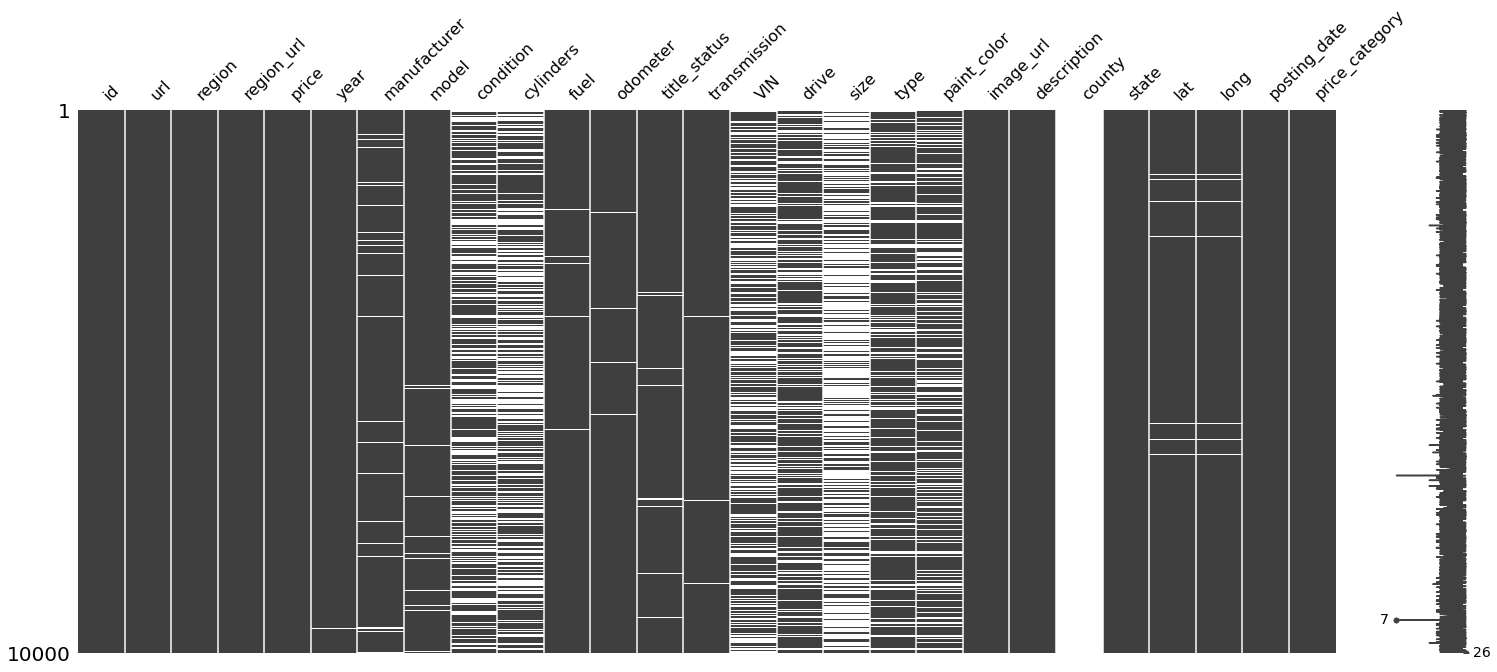

In [ ]:
msno.matrix(df);

Существует два подхода для работы с пропущенными значениями:
- полное удаление строки или столбца, которые содержат пропуски;
- заполнение пропусков статистиками, например средним значением по признаку (если мы хотим оставить строку с полезной информацией).

Из матрицы пропусков мы видим, что пропуски разбросаны по всему датасету, поэтому мы не можем просто взять и удалить все строки, где они есть. Но при этом можем удалить неинформативные признаки, например `county` или `size`. 

Обычно неинформативным считается признак, в котором пропущено 20–30% значений. Пропуски — необязательно NaN: иногда это могут быть знаки вопроса, другие символы, которые означают, что в ячейке датафрейма располагается информация, которая будет бесполезна. В этом случае нужно внимательно изучить, что означают странные значения в датафрейме, и оценить их связь со значениями в других признаках. Иногда требуется посмотреть на исходные данные, если у вас есть доступ к источнику данных, например к базе данных компании. 

Посмотрим именно на те значения, которые реально пропущены. 
Перед тем как удалять признаки, выведем процент пропущенных значений в каждом признаке, чтобы понять, какие признаки можно удалить без жалости, а какие, возможно, стоит оставить. 

Для этого с помощью `isna` создадим маску, где у каждого объекта будет `True` или `False`, а затем просуммируем получившиеся значения (при работе с булевыми значениями `sum` посчитает количество входящих `True`). После этого разделим на всё количество объектов, домножим на 100 для перевода в проценты и отсортируем по возрастанию.


In [ ]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()

print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


id                  0.00
state               0.00
price               0.00
price_category      0.00
region              0.00
url                 0.00
region_url          0.00
description         0.02
image_url           0.02
posting_date        0.02
year                0.36
odometer            0.43
transmission        0.45
fuel                0.63
lat                 0.98
long                0.98
model               1.28
title_status        1.66
manufacturer        3.82
type               21.94
paint_color        29.50
drive              30.06
condition          37.66
VIN                39.38
cylinders          40.80
size               71.91
county            100.00
dtype: float64

Проверим заполненность `county` ещё одним способом: используя `value_counts`, передадим параметр `dropna=False`. Параметр указывает, что незаполненные значения также нужно посчитать.




In [ ]:
df['county'].value_counts(dropna=False)

NaN    10000
Name: county, dtype: int64

Действительно 10 000 NaN. Удалим эту колонку.

Делать это будем в новом датафрейме `df_clean`, чтобы сохранить исходный датасет. Так, если мы поймём, что преобразования, которые мы делали, нам не подходят, то сможем вернуться к исходному датасету.

In [ ]:
df_clean = df.copy()

Удалять столбцы можно с помощью метода `drop`, в который передаётся список столбцов на удаление. 

In [ ]:
df_clean = df_clean.drop(columns=['county'])
df_clean.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,NaN,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,NaN,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


Оставшиеся столбцы содержат от 0 до 71% заполненных значений. Проверим, сколько полностью заполненных объектов во всём наборе данных. Напишем функцию на основе `dropna` — этот метод используется для удаления строк и столбцов с пустыми значениями.




In [ ]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', 
          len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', 
          round(len(df.dropna()) / len(df) * 100, 2))
    

print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 823
Процент полностью заполненных объектов из всей выборки: 8.23


Полностью заполнено чуть больше 8% объектов, а значит, как мы и предполагали ранее, удалить такие объекты полностью мы не можем, иначе выборка уменьшится в 12 раз.

Следующим шагом удалим ещё семь столбцов, в которых более 20% пропущенных значений.

Сейчас мы выбрали порог в 20%, в других задачах он может отличаться в большую и даже в меньшую сторону. К примеру, несмотря на большое количество пропущенных значений, цвет автомобиля может сильно влиять на его стоимость, так как существуют премиальные цвета.


In [ ]:
df_clean = df_clean.drop(
    columns=['VIN', 'condition', 'cylinders', 'size', 'drive', 'paint_color', 'type']
)
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 9134
Процент полностью заполненных объектов из всей выборки: 91.34



После удаления количество полностью заполненных значений выросло почти до 92%. С таким процентом мы могли бы уже с помощью `dropna` удалить строки, в которых есть хоть один пропуск, и при этом потеряли бы только одну десятую часть выборки. Но по отдельности в каждом признаке осталось не так много пропусков, поэтому эти признаки пока оставим и будем придерживаться стратегии заполнения пустых значений.

В зависимости от того, к какому типу относится переменная, представляющая наш признак, существует несколько вариантов заполнения пропусков:
- Если это качественная, то есть категориальная переменная, то мы можем заполнить пропуски либо самым популярным значением в выборке, либо новым значением, которое ранее не встречалось в выборке. Или даже заполнить значениями, рассчитанными на основе других колонок, в которых может содержаться похожая информация.
- Если мы работаем с числами, то на помощь приходят меры центральной тенденции: среднее значение, мода или медиана.

Рассмотрим заполнение на примере нескольких колонок. Выведем количество значений в колонке `manufacturer` (производитель транспортного средства), учитывая и незаполненные значения. 

In [ ]:
df_clean['manufacturer'].value_counts(dropna=False)

ford               1638
chevrolet          1293
toyota              779
jeep                490
honda               466
nissan              454
ram                 411
NaN                 382
gmc                 358
bmw                 330
dodge               325
volkswagen          251
mercedes-benz       239
hyundai             225
subaru              210
kia                 200
audi                200
lexus               184
cadillac            183
chrysler            161
acura               150
buick               145
mazda               142
infiniti            117
lincoln             113
mitsubishi           82
mini                 72
volvo                67
pontiac              61
rover                59
jaguar               45
porsche              37
mercury              32
tesla                27
saturn               25
fiat                 23
alfa-romeo           14
ferrari               4
harley-davidson       4
datsun                2
Name: manufacturer, dtype: int64

Видим, что для 382 объектов производитель не заполнен. Но у нас есть колонки, из которых потенциально можно восстановить производителя — модель автомобиля и его описание. Посмотрим на значение этих двух признаков для тех объектов, в которых не заполнена модель. 


In [ ]:
df_clean[df_clean['manufacturer'].isna()][['model', 'description']]

,model,description
21,oldsmobile 442,1970 Oldsmobile 442 Convertible 442 Indy Pace ...
66,Diahatsu,1991 Daihatsu hijet 5 speed extended cab....im...
182,Scion iM Hatchback 4D,Carvana is the safer way to buy a car During t...
201,Voltswagon Beetle,"New Brakes, new serpentine belt, new catalytic..."
217,THOMAS SCHOOL BUS,5.9 CUMMINS DIESEL; 28 Passenger with 2 Rear A...
...,...,...
9908,Scion xD Hatchback 4D,Carvana is the safer way to buy a car During t...
9959,FREIGHTLINER M2 106,"2013 *FREIGHTLINER* *M2 106* M2106 - $24,900Ca..."
9985,Suzuki Grand Vitara,"2012 Suzuki Grand Vitara Premium 4WD - $7,450 ..."
10002,F-150,2020 *Ford* *F-150* 180 MILES. LIFTED FORD F15...


По той малой части, что отобразилась, можно подтвердить, что производитель транспортного средства часто указан в наименовании модели или в описании. Например, в строке с индексом 9985 легко узнать Suzuki. 

Но чтобы сделать такое заполнение пропущенных значений, нужно верно обработать строки и проверить производителей по имеющемуся словарю — в общем, потрудиться чуть больше, чем мы предполагаем. Поэтому сейчас просто заполним пропущенные значения  новым значением other, или «другой». Сделаем это с помощью `fillna`:




In [ ]:
df_clean['manufacturer'] = df_clean['manufacturer'].fillna('other')

Проверим, используя `isna`, что пропущенных значений в колонке с производителем не осталось.

In [ ]:
df_clean['manufacturer'].isna().sum()

0

Так и есть, всё заполнено.

Теперь посмотрим на числовые переменные. Выведем количество значений  в колонке с количеством пройденных миль, включая пустые. 

In [ ]:
df_clean['odometer'].value_counts(dropna=False)

100000.0    50
NaN         43
1.0         42
180000.0    37
200000.0    37
            ..
32086.0      1
126872.0     1
68967.0      1
124248.0     1
61943.0      1
Name: odometer, Length: 7007, dtype: int64

43 объекта не содержат информацию о пробеге. Посмотрим на эти строки внимательнее.




In [ ]:
df_clean[df_clean['odometer'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
240,7306504389,https://bakersfield.craigslist.org/ctd/d/fresn...,bakersfield,https://bakersfield.craigslist.org,29998,2016.0,lexus,nx,gas,NaN,clean,automatic,https://images.craigslist.org/00r0r_7hJfyJGBZb...,2016 *** Lexus NX 200t F Sport SUV *** Read...,ca,36.837679,-119.809638,2021-04-13T19:15:45-0700,high
341,7313513841,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,27495,2011.0,cadillac,cts-v coupe,gas,NaN,clean,automatic,https://images.craigslist.org/00W0W_aQNTz1yato...,2011 *** Cadillac CTS-V Coupe 2dr Cpe Coupe **...,nm,35.087703,-106.579999,2021-04-27T14:15:30-0600,high
400,7315580028,https://fresno.craigslist.org/ctd/d/north-holl...,fresno / madera,https://fresno.craigslist.org,28995,2017.0,chevrolet,silverado 1500,gas,NaN,clean,automatic,https://images.craigslist.org/00U0U_dTBRu7M6xI...,2017 Chevrolet Silverado 1500 2WD Double Cab 1...,ca,34.190040,-118.387533,2021-05-01T17:03:13-0700,high
564,7314899346,https://fresno.craigslist.org/ctd/d/fresno-201...,fresno / madera,https://fresno.craigslist.org,44598,2018.0,mercedes-benz,e-class,gas,NaN,clean,automatic,https://images.craigslist.org/00000_8QIFfftsxf...,Drive it home today. Call (Or Text) us now !!C...,ca,36.837679,-119.809638,2021-04-30T10:33:51-0700,high
933,7313530642,https://bakersfield.craigslist.org/ctd/d/fresn...,bakersfield,https://bakersfield.craigslist.org,33898,2015.0,other,Maserati Ghibli,gas,NaN,clean,automatic,https://images.craigslist.org/00a0a_WtMWXlB7ek...,2015 *** Maserati Ghibli S Q4 Sedan *** Rea...,ca,36.837679,-119.809638,2021-04-27T13:45:52-0700,high
1566,7314651593,https://bend.craigslist.org/ctd/d/gladstone-20...,bend,https://bend.craigslist.org,11985,2006.0,honda,pilot,gas,NaN,clean,automatic,https://images.craigslist.org/01313_dba0iHoXBW...,2006 Honda Pilot EX L w/DVD 4dr SUV 4WD SUV ...,or,45.374861,-122.602289,2021-04-29T19:19:17-0700,medium
1729,7316459394,https://yakima.craigslist.org/ctd/d/yakima-201...,yakima,https://yakima.craigslist.org,6999,2012.0,jeep,liberty,gas,NaN,clean,automatic,https://images.craigslist.org/00J0J_kF1MimeKNG...,2012 *** JEEP LIBERTY SPORT SUV *** Ready T...,wa,46.584837,-120.508958,2021-05-03T15:00:47-0700,low
1854,7310422912,https://yubasutter.craigslist.org/ctd/d/sacram...,yuba-sutter,https://yubasutter.craigslist.org,9988,2015.0,volkswagen,beetle - new tires - leather and heated seats -,gas,NaN,clean,automatic,https://images.craigslist.org/00G0G_5sshuwwxzJ...,Drive it home today. Call (Or Text) us now !!C...,ca,38.589200,-121.405700,2021-04-21T10:31:39-0700,medium
1903,7308735851,https://charlotte.craigslist.org/ctd/d/mount-m...,charlotte,https://charlotte.craigslist.org,12250,2016.0,toyota,scion tc,gas,NaN,clean,manual,https://images.craigslist.org/00t0t_5mwiKHrm7n...,2016 Scion tC Sports Coupe 6-Spd MT Offere...,nc,35.589154,-80.832039,2021-04-18T11:01:47-0400,medium
2130,7302733118,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,14700,2016.0,ford,fusion,NaN,NaN,NaN,NaN,https://images.craigslist.org/00O0O_fkFRDDi4yq...,Car Starz Call Sales at 717-401-4221 2016 Ford...,pa,41.261540,-78.704520,2021-04-06T14:39:29-0400,medium


Числовые пропуски  обычно заполняются мерами центральной тенденции. В зависимости от типа признака и его распределения можно выбрать наиболее подходящую меру. 

Заполним все пропуски в пробеге средним значением. Сначала посмотрим на него.

In [ ]:
int(df_clean['odometer'].mean())

95674

Через `fillna` передадим среднее значение как параметр. 

In [ ]:
df_clean['odometer'] = df_clean['odometer'].fillna(int(df_clean['odometer'].mean()))

Проверим, что незаполненных значений не осталось.





In [ ]:
df_clean['odometer'].isna().sum()

0

В датафрейме ещё остались пропуски, но пока остановимся на двух примерах и пойдём исследовать и преобразовывать данные дальше. Но сначала запишем изменения в новый файл `df_clean.csv`.

In [ ]:
df_clean.to_csv('./data/df_clean.csv', index=False)